## Introduction

Understand the creditworthiness of a customer is a key task for banks. In this project, we will use the data from a German bank to build a credit scoring model to predict the probability of default. The data is from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)).
The data contains 1000 entries with 20 features. The features are a mix of numeric and categorical variables. The target variable is a binary variable indicating whether the customer is a good or bad credit risk. The data is split into 700 training and 300 testing samples. The goal is to build a model to predict the probability of default for the testing samples.

While extension of credit can be traced back to babylonian times, the history of credit scoring classification can be traced back to a 1941 study distinguish good loans from bad loans [@durand.1941;@crook.2006]. The first credit scoring model was developed in 1958 by Fair Isaac Corporation (FICO). The FICO score is still the most widely used credit score in the world. The FICO score is based on a logistic regression model. In this project, we will build a logistic regression model and compare its performance with other machine learning models.

In [35]:
from pybliometrics.scopus import ScopusSearch
from tabulate import tabulate
import pandas as pd
query = r' TITLE-ABS-KEY("Journal Impact" AND "Eigenfactor")'
s1=ScopusSearch(query)
print(s1.get_results_size()) 
df1=pd.DataFrame(s1.results)
print(
    tabulate(df1[['publicationName','title','citedby_count']].sort_values(
    by='citedby_count',ascending=False).head(10)
         ,headers='keys',tablefmt='plain'))

122
     publicationName                                                                  title                                                                                                                                                                                              citedby_count
 34  Irish Journal of Medical Science                                                 Current concepts on bibliometrics: a brief review about impact factor, Eigenfactor score, CiteScore, SCImago Journal Rank, Source-Normalised Impact per Paper, H-index, and alternative metrics              186
 77  Radiographics                                                                    Understanding bibliometric parameters and analysis                                                                                                                                                           150
118  Proceedings of the National Academy of Sciences of the United States of America  The most influential jour

To understand the modelling of credit risk using artificial intelligence (AI) and machine learning we first perform a systematic literature review using using bibliometric techniques on the measure of science[@goden.2006].  Specifically we using the python package `pybliometrics` to query the Scopus database using their API. To further improve the quality of the bibliometric search we using an objective measure of journal quality known as the Eigenfactor metrics.

Journal Impact Factors (JIFs) have long been a popular metric for evaluating the quality of academic journals. They are calculated by dividing the number of citations a journal receives in a given year by the total number of citable items published in that journal during the preceding two years. However, JIFs have been the subject of much criticism, primarily due to their potential for manipulation, bias, and incentivising questionable research practices (Seglen, 1997; Brembs et al., 2013).

Variations in citation practices, differing lag between publication and citation, differing use of JCR-indexed literature for citation and distinct levels of impact factor inflation across research fields contribute to this challenge [@althouse.2008]. Eigenfactor metrics, which are derived from the Eigenfactor Score (ES) and the Article Influence Score (AIS), have been proposed as an alternative to JIFs (Bergstrom, 2007). These metrics are based on a journal's citation network and take into account both the quality and quantity of citations (Bergstrom et al., 2008).

In [2]:
query = r' TITLE-ABS-KEY(("artificial intelligence" OR "machine learning") AND ("credit scoring"))'
s=ScopusSearch(query)
print(s.get_results_size()) 
df=pd.DataFrame(s.results)
df.to_csv('scopus_2023.csv')
jcr=pd.read_csv('jcr_2021.csv')

621


The above code using the Scopus API to perform an initital literature review of application of AI and machine learning in credit scoring.  Using a Scopus search `TITLE-ABS-KEY(("artificial intelligence" OR "machine learning") AND ("credit risk" OR "credit scoring"))` we find that there have been 621 academic papers published.

In [3]:
# Check for missing values
#print(jcr['ISSN'].isnull().sum())
#print(jcr['ISSN'].head())
#print(df['issn'].isnull().sum())
#print(df['issn'].head())
# Tidy up both dataframes before merging
jcr=jcr[jcr['ISSN'].notnull()]
df=df[df['issn'].notnull()]
jcr['issn']=jcr['ISSN'].str.replace('-','')
jcr=jcr.drop_duplicates(subset='Journal name',keep='first')
df_q=pd.merge(df, jcr, on='issn', how='left')
df_q.shape

(389, 64)

### Filtering on high quality journals

Bibliometric analysis, a robust methodology within the realm of scientometrics, has gained significant prominence in academic research (Van Raan, 2005; Glänzel & Schubert, 2005). This approach involves quantitative analysis of scholarly publications, aiming to unveil patterns, trends, and relationships within the literature of a specific field or research domain (Chen, 2017; Bornmann, 2019). By systematically examining publication metadata, citation patterns, and co-authorship networks, bibliometric analysis offers valuable insights into the knowledge landscape, intellectual structure, and scholarly impact of a particular discipline (Leydesdorff & Rafols, 2009; Ding et al., 2011).

The application of bibliometric analysis spans across diverse fields, including science, technology, social sciences, and humanities (Van Eck & Waltman, 2014; Borrego et al., 2016; Mikolov et al., 2013). Its utility lies in its ability to uncover patterns of knowledge dissemination, identify influential authors and institutions, trace the development of research themes over time, and assess the impact of scholarly works through citation analysis (Liu & Rousseau, 2016; Glänzel et al., 2019). Furthermore, bibliometric analysis assists in identifying research gaps, directing research efforts, and guiding policy-making decisions (Larivière et al., 2013; Abramo et al., 2020).

The Journal Impact Factor (JIF) has been widely used as a measure of journal quality and research impact. Despite its popularity, JIF has been criticised for various reasons, such as its susceptibility to manipulation and its potential to encourage questionable research practices. This paper provides an academic critique of Journal Impact Factors and discusses the potential improvements that can be made through the application of Eigenfactor metrics. We argue that Eigenfactor metrics can address some of the limitations of JIF, offering a more robust and nuanced approach to evaluating journal quality and research impact.

Journal Impact Factors (JIFs) have long been a popular metric for evaluating the quality of academic journals. They are calculated by dividing the number of citations a journal receives in a given year by the total number of citable items published in that journal during the preceding two years. However, JIFs have been the subject of much criticism, primarily due to their potential for manipulation, bias, and incentivising questionable research practices (Seglen, 1997; Brembs et al., 2013).

Critique of Journal Impact Factors:

Inherent biases: JIFs are criticised for having inherent biases that favor journals in certain disciplines or with larger citation networks (Leydesdorff, 2008). This can result in an unfair comparison between journals in different fields and may lead to a skewed perception of research quality.

Susceptibility to manipulation: The calculation of JIFs can be easily manipulated by practices such as self-citation, coercive citation, and salami slicing (Wilhite and Fong, 2012; Vanclay, 2012). This can result in inflated JIFs that do not accurately reflect the true impact or quality of a journal.

Focus on short-term impact: JIFs place more emphasis on short-term impact rather than long-term significance by only considering citations from the preceding two years (Adler et al., 2009). This can result in the undervaluation of important research with a more gradual impact. However, a 5 year impact factor is also now being published to accomodate for differing citation peaks across various fields, although the original 2 year impact factor seems to be the more referred one.

Encouraging questionable research practices: The pressure to publish in high-impact journals may lead to researchers engaging in questionable practices such as p-hacking or HARKing (Head et al., 2015; Kerr, 1998).

Improvements through Eigenfactor Metrics:

The interdisciplinary aspect of Fintech due to the technologies involved has seen research being carried out in various subject areas, with prominent contribution from Finance and Computer Science related academic sources. The challenge, however, remains to identify the top avenues based on quality due to the differing attributes and ranking methodologies. Variations in citation practices, differing lag between publication and citation, differing use of JCR-indexed literature for citation and distinct levels of impact factor inflation across research fields contribute to this challenge [@althouse2008]. Eigenfactor metrics, which are derived from the Eigenfactor Score (ES) and the Article Influence Score (AIS), have been proposed as an alternative to JIFs (Bergstrom, 2007). These metrics are based on a journal's citation network and take into account both the quality and quantity of citations (Bergstrom et al., 2008).

Mitigating biases: By considering the entire citation network rather than just citations within a specific timeframe, Eigenfactor metrics can help reduce the biases associated with JIFs (West et al., 2010).

Resistant to manipulation: Eigenfactor metrics are less susceptible to manipulation as they take into account the quality of citations and are less influenced by self-citation (Bergstrom et al., 2008).

Emphasis on long-term impact: Unlike JIFs, Eigenfactor metrics do not emphasise short-term impact and can provide a more accurate representation of a journal's long-term significance.

Discouraging questionable research practices: As Eigenfactor metrics are less susceptible to manipulation, they may help discourage questionable research practices by reducing the emphasis on JIFs.

Although Journal Impact Factors have been a popular metric for assessing journal quality, they are susceptible to various criticisms, including biases, susceptibility to manipulation, and their focus on short-term impact. In response to these limitations, Eigenfactor metrics have been proposed as an alternative approach. Eigenfactor metrics consider the entire citation network, mitigate biases, and are resistant to manipulation. They provide a more accurate representation of a journal's long-term impact and discourage questionable research practices associated with JIFs. By adopting Eigenfactor metrics, the evaluation of journal quality and research impact can become more robust and nuanced.

Eigenfactor metrics offer a quantitative approach to ranking the vast amount of research produced by numerous journals across various subject areas. It leverages the concept of eigenvector centrality, commonly used in linear algebra and with applications in quantitative finance. In the context of journal rankings, eigenvector centrality determines the importance of a journal based on the extent and strength of its connections with other journals through citations [@west2010]. This approach provides a measure of influence within the citation network of journals.

The primary metric used in Eigenfactor analysis is the Eigenfactor score. It considers cross-citation data among thousands of journals to assess the proportion of the total weighted citations received by a specific journal. By constructing a stochastic matrix using cross-citation data, the Eigenfactor score quantifies the influence of a journal based on both the volume and weightage of its citation network [@west_2008]. Notably, this metric addresses biases such as self-citation and incorporates data from the last five years. Eigenfactor scores are normalized to 1 or 100 (as percentages) to indicate the proportion of value or influence generated by a journal, making them additive in nature. The underlying principle is that highly influential journals are likely to be cited by other influential journals.

Compared to the traditional Journal Impact Factor approach, Eigenfactor metrics offer several advantages. They go beyond simple citation counts and control for differences across disciplines. For example, in the field of Economics, the Journal Impact Factor may rank Health Economic journals higher than top Economic journals due to the higher number of references per paper in health journals. Eigenfactor Metrics corrects for this by simulating a random walk on the citation network, adjusting the influence of journals with a large number of out-citations. These corrections help normalize differences in citation cultures across disciplines and multidisciplinary journals.

It is important to note that Eigenfactor scores can be influenced by the size of a journal. For instance, the Journal of Health Economics, a 3-star ABS journal, may have a higher Eigenfactor (0.013) compared to Quantitative Economics, a 4-star ABS journal with a lower Eigenfactor (0.005). This discrepancy arises because the Eigenfactor measures the total influence of a journal, which can be affected by its size and citation patterns.

The Eigenfactor analysis also includes the Article Influence Score, which complements the Eigenfactor Score by accounting for the size of the journal. The Article Influence Score is calculated by dividing the journal's Eigenfactor Score by the number of articles published in that journal. This adjustment is necessary because larger journals with a greater number of articles are more likely to receive higher Eigenfactor scores due to the increased chances of visits. By providing a per-article influence score, the Article Influence Score enables a more meaningful comparison of journal impact, similar to the traditional Impact Factor metric [@west2010].

By incorporating both the Eigenfactor Score and the Article Influence Score, Eigenfactor metrics offer a comprehensive approach to evaluating journal quality and research impact. These metrics consider the influence of a journal within the citation network, account for differences in citation cultures across disciplines, and address biases associated with traditional Journal Impact Factors. Researchers and stakeholders can utilize Eigenfactor metrics to gain a more nuanced understanding of journal influence and make informed decisions regarding scholarly publications.



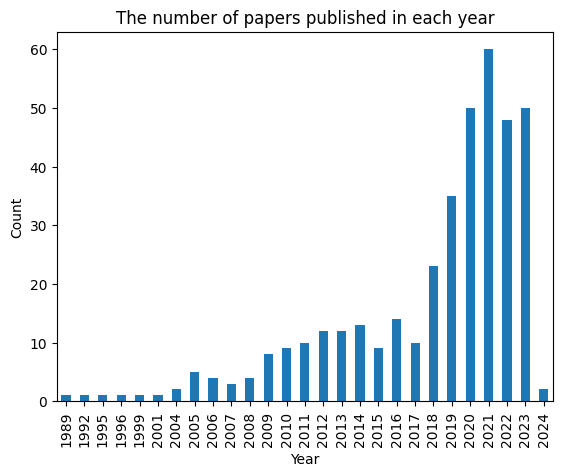

In [4]:
# plot the count of the papers published in each year
import matplotlib.pyplot as plt
df['year']=df['coverDate'].apply(lambda x: x.split('-')[0])
df['year']=df['year'].astype(int)
df['year'].value_counts().sort_index().plot(kind='bar')
# Give the plot a title
plt.title("The number of papers published in each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [ ]:
from tabulate import tabulate
# Function to wrap text
def wrap_text(text, max_width=20):
    chunks = [text[i:i+max_width] for i in range(0, len(text), max_width)]
    return '\n'.join(chunks)

# Wrap large text entries
for row in data:
    row[-1] = wrap_text(row[-1])

# Generate table
print(tabulate(data, headers=['Name', 'Email', 'Description'], tablefmt='pipe'))

In [5]:
# Filter the scopus search on the top 5 cited articles
from tabulate import tabulate
df=df.sort_values(by='citedby_count',ascending=False)
print(tabulate(df[['title','citedby_count','subtypeDescription','coverDisplayDate','description']].head(),
               headers=['Title','Citations',"Flavour",'Date Published','Abstract'], 
               numalign='left', tablefmt='plain',showindex=False))

Title                                                                        Citations    Flavour           Date Published    Abstract
A few useful things to know about machine learning                           1727         Review            October 2012      MACHINE LEARNING SYSTEMS automatically learn programs from data. This is often a very attractive alternative to manually constructing them, and in the last decade the use of machine learning has spread rapidly throughout computer science and beyond. Machine learning is used in Web search, spam filters, recommender systems, ad placement, credit scoring, fraud detection, stock trading, drug design, and many other applications. A recent report from the McKinsey Global Institute asserts that machine learning (a.k.a. data mining or predictive analytics) will be the driver of the next big wave of innovation. 15 Several fine textbooks are available to interested practitioners and researchers (for example, Mitchell 16 and Witten et al. 2

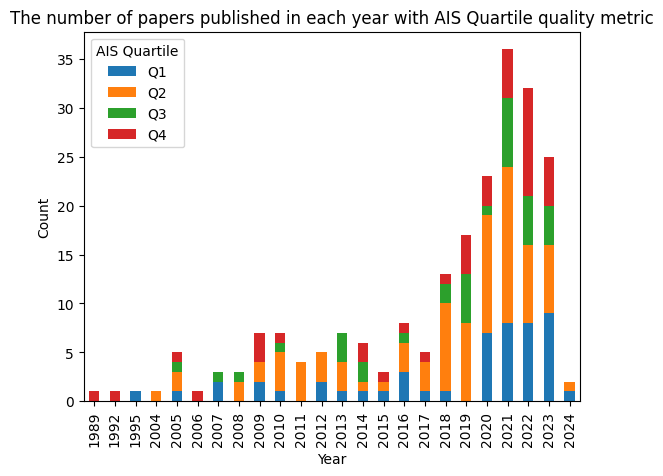

In [6]:
# plot the count of the papers published in each year in df_q using the AIS Quartile columns to colour the bars
import matplotlib.pyplot as plt
df_q['year']=df_q['coverDate'].apply(lambda x: x.split('-')[0])
df_q['year']=df_q['year'].astype(int)
# Drop the rows where the AIS Quartile is missing
df_q_plot=df_q[df_q['AIS Quartile'].notnull()]
# create a stacked plot of the number of papers published in each year with AIS Quartile quality metric
df_q_plot.groupby(['year','AIS Quartile']).size().unstack().plot(kind='bar',stacked=True)
# Give the plot a title
plt.title("The number of papers published in each year with AIS Quartile quality metric")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [19]:
abs=pd.read_csv('JCR_ABS.csv')
abs=abs[abs['ISSN'].notnull()]
abs[abs['Journal name'].str.title()=="Journal Of Accounting & Economics"]

,ISSN,Field,Journal Title,Publisher Name,Scopus,Web of Science™,AJG 2021,AJG 2018,AJG 2015,ABS 2010,...,JIF Percentile,JIF Quartile,AIS Quartile,Citable Items,% of Articles in Citable items,Cited Half-Life,Citing Half-Life,Total Articles,eISSN,ISSN.x
2,1879-1980,ACCOUNT,Journal of Accounting and Economics,Elsevier,scopus,WoS,4*,4*,4*,4.0,...,94.14,Q1,Q1,50.0,100%,14.9,11.0,50.0,NaN,NaN


In [22]:
# Filter the scopus search on the top 5 cited articles
from tabulate import tabulate
df_q_plot=df_q_plot.sort_values(by='Article Influence Score',ascending=False)
tab_fmt=tabulate(df_q_plot[['title','AIS Quartile','Article Influence Score','publicationName','coverDisplayDate','description']].head(),
               headers=['Title','Ranking','Article Influence Score',"Journal",'Date Published','Abstract','Ranking'], 
               numalign='left', tablefmt='plain',showindex=False,stralign='left',colalign='left')
print(tab_fmt)

                                                                                                                     Title    Ranking    Article Influence Score                                   Journal  Date Published    Abstract
Machine + man: A field experiment on the role of discretion in augmenting AI-based lending models                           Q1         5.728                      Journal of Accounting and Economics       1 November 2020   We assess the role of human discretion in lending outcomes using a randomized, controlled experiment. The lenders in our sample utilize a third party, machine-generated credit model as an input in their decision. We design a new feature for the credit-scoring platform – the slider feature – which invites lenders to incorporate additional discretion in their decision by adjusting the machine-based recommendation. We compare the loan outcomes for treatment lenders that randomly get the slider, relative to a control group. The treatment group's

In [48]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

1. Eyeball the raw data
2. Check the data types
3. Check the missing values
4. Check the outliers
5. Check the correlations
6. descriptive statistics for numerical variables
7. descriptive statistics for categorical variables


In [49]:
# load the data
dat_raw =pd.read_csv('credit.csv')
dat_raw.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [50]:
# check the data for missing values
dat_raw.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [51]:
# check data for categorical variables
dat_raw.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [52]:
# run descriptive statistics and transpose the output then use tabulate to display the output
from tabulate import tabulate
sum_stats=dat_raw.describe().transpose()
print(tabulate(sum_stats, headers='keys', tablefmt='psql'))

+----------------------+---------+----------+-------------+-------+--------+--------+---------+-------+
|                      |   count |     mean |         std |   min |    25% |    50% |     75% |   max |
|----------------------+---------+----------+-------------+-------+--------+--------+---------+-------|
| months_loan_duration |    1000 |   20.903 |   12.0588   |     4 |   12   |   18   |   24    |    72 |
| amount               |    1000 | 3271.26  | 2822.74     |   250 | 1365.5 | 2319.5 | 3972.25 | 18424 |
| percent_of_income    |    1000 |    2.973 |    1.11871  |     1 |    2   |    3   |    4    |     4 |
| years_at_residence   |    1000 |    2.845 |    1.10372  |     1 |    2   |    3   |    4    |     4 |
| age                  |    1000 |   35.546 |   11.3755   |    19 |   27   |   33   |   42    |    75 |
| existing_loans_count |    1000 |    1.407 |    0.577654 |     1 |    1   |    1   |    2    |     4 |
| dependents           |    1000 |    1.155 |    0.362086 |     

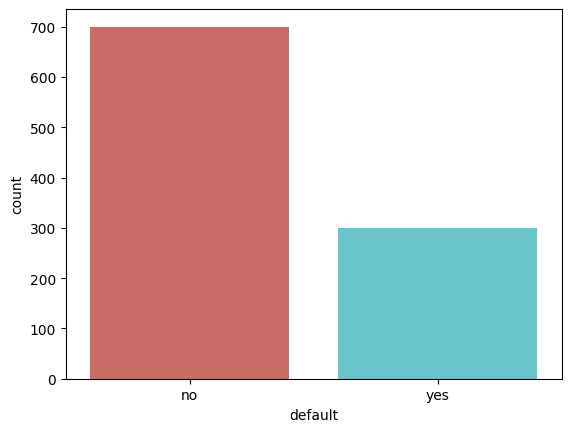

In [53]:
# check the distribution of the target variable
sns.countplot(x='default',data=dat_raw, palette='hls')
plt.show()

In [54]:
# run descriptive statistics for the categorical features
sum_stat=dat_raw.describe(include=['object']).transpose()
print(tabulate(sum_stat, headers='keys', tablefmt='psql'))

+---------------------+---------+----------+----------------------+--------+
|                     |   count |   unique | top                  |   freq |
|---------------------+---------+----------+----------------------+--------|
| checking_balance    |    1000 |        4 | unknown              |    394 |
| credit_history      |    1000 |        5 | good                 |    530 |
| purpose             |    1000 |        6 | furniture/appliances |    473 |
| savings_balance     |    1000 |        5 | < 100 DM             |    603 |
| employment_duration |    1000 |        5 | 1 - 4 years          |    339 |
| other_credit        |    1000 |        3 | none                 |    814 |
| housing             |    1000 |        3 | own                  |    713 |
| job                 |    1000 |        4 | skilled              |    630 |
| phone               |    1000 |        2 | no                   |    596 |
| default             |    1000 |        2 | no                   |    700 |

In [55]:
#  load the raw data and use the LabelEncoder() function to convert the categorical features to numeric
from sklearn.preprocessing import LabelEncoder
dat=dat_raw.copy()
le=LabelEncoder()

In [56]:
# find the categorical variables in the data then using the label encoder to convert them to numeric
cat_vars=dat.select_dtypes(include=['object']).columns
for col in cat_vars:
    dat[col]=le.fit_transform(dat[col])


In [65]:
# Define the gym environment
import gym
from gym import spaces
import pandas as pd
import numpy as np

class CreditScoringEnv(gym.Env):
    def __init__(self, data):
        self.data = data
        super(CreditScoringEnv, self).__init__()
        
        # Action Space: Default yes or no (1 or 0) this is not the action but a precursor to the action
        self.action_space = spaces.Discrete(2)
        
        # State Space: You can define as many features as relevant from the data
        # Assuming using age, income, credit score
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(3,))
        

    def reset(self):
        self.current_step = 0
        return self.data.iloc[self.current_step].values

    def step(self, action):
        self.current_step += 1

    # Terminal state
        if self.current_step >= len(self.data):
            done = True
            self.current_step = 0  # Reset for the next episode
            return None, 0, done, {}
        
        state = self.data.iloc[self.current_step].values
        reward = self.get_reward(state, action)
    
        return state, reward, False, {}
        
    def get_reward(self, state, action):
        # Define your reward function based on the state and action
        # For simplicity, assume that approving a good loan gets +1
        # and approving a bad loan gets -2 reward.
        # You would normally use a more complex function based on the data.
        if state[-1] == 1 and action == 1:  # Good loan and approved
            return 1
        elif state[-1] == 0 and action == 1:  # Bad loan and approved
            return -2
        else:
            return 0  # Otherwise, no reward or loss


In [66]:
# split the data into states and actions
states_x=dat.drop(['default'],axis=1)
actions_y=dat['default']
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
states_x_scaled=scaler.fit_transform(states_x)
# split the data into training and testing sets
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(actions_y,states_x_scaled,test_size=.3,random_state=123)
# Convert the numpy array back to DataFrame
states_x_scaled_df = pd.DataFrame(states_x_scaled, columns=states_x.columns)
# Concatenate
dat_combined = pd.concat([states_x_scaled_df, actions_y], axis=1)

In [68]:
# Reinforcement Learning
import random
 #Initialize the Gym environment with the new DataFrame
env = CreditScoringEnv(data=dat_combined)
state = env.reset()

# Initialize Q-table with zeros
Q = np.zeros([len(env.data), env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 1.0

# Training the Q-learning model
for episode in range(1, 10001):
    done = False
    while not done:
        print(f'Type of state: {type(state)}, Type of action: {type(action)}')
        print(f'Value of state: {state}, Value of action: {action}')

        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        
        next_state, reward, done, _ = env.step(action)
        
        # Update Q-value using the Bellman equation for Q-learning which is defined as:
        # Q(s,a) = (1 - alpha) * Q(s,a) + alpha * (reward + gamma * max Q(s',a')) DOUBLE CHECK THIS
        old_value = Q[state, action]
        next_max = np.max(Q[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        Q[state, action] = new_value
        
        state = next_state
    
    # Reduce epsilon to shift from exploration to exploitation (i.e. less random actions as the agent learns)
    if epsilon > 0.01:
        epsilon *= 0.995

# At this point, Q contains the Q-values, and you can derive the policy from it.
# For example, you can get the policy for the first state as follows:
print(np.argmax(Q[0]))


Type of state: <class 'numpy.ndarray'>, Type of action: <class 'int'>
Value of state: [-0.4645937  -1.23647786 -1.01055883  0.90853382 -0.74513141  1.66990103
  1.09776229  0.91847717  1.04698668  2.76645648  0.21834568 -0.13371046
  1.02707891 -0.2896393  -0.42828957  1.21459768  0.        ], Value of action: 1


IndexError: arrays used as indices must be of integer (or boolean) type

In [82]:
Q[1:10, 1:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Incorporating fairness criteria into an MDP for credit scoring is crucial to ensure that the decision-making process does not discriminate against certain groups based on sensitive attributes like gender, race, or age. There are different notions of fairness that can be applied, such as demographic parity, equalized odds, or disparate impact.  One way to do this would be to modify the State Space by including sensitive attributes.


In [ ]:
## 1. Modify the State Space
# State Space: Now also includes a sensitive attribute (e.g., gender)
self.observation_space = spaces.Box(low=0, high=np.inf, shape=(4,))

### 2. Modify the Reward Function

The reward function is where you can apply your fairness constraints. For example, you can add a penalty term if the decision violates your fairness criteria.


In [ ]:
def get_reward(self, state, action):
    sensitive_attribute = state[-2]  # Assuming the second last feature is the sensitive attribute
    loan_status = state[-1]
    
    reward = 0
    
    if loan_status == 1 and action == 1:
        reward = 1
    elif loan_status == 0 and action == 1:
        reward = -2

    # Apply fairness penalty
    fairness_penalty = self.calculate_fairness_penalty(state, action)
    reward -= fairness_penalty
    
    return reward

def calculate_fairness_penalty(self, state, action):
    # Implement your fairness metric here, for example, demographic parity
    # For simplicity, let's assume we subtract a penalty if loan is approved
    # for a disadvantaged group member
    sensitive_attribute = state[-2]
    
    if sensitive_attribute == 'disadvantaged' and action == 1:
        return 0.5
    else:
        return 0


## 3. Update the Q-Learning Algorithm

You might also want to update your learning algorithm to consider fairness, for instance by adjusting the Q-value update rule. In the simplest case, the fairness penalty can be included in the reward, as above, and no changes to the algorithm are required.

However, more advanced techniques might involve multi-objective reinforcement learning, where you would have one objective for maximizing loan profitability and another for fairness. In this case, you would need to update the Q-value update rule to consider both objectives.

### 4. Monitor Fairness Over Time

As the model is training, keep track of fairness metrics over time. You might also have to regularly audit your system to ensure that it remains fair as more data becomes available.


Incorporating fairness criteria into an MDP is a complex task that may involve significant design and ethical considerations. Given your background in finance, technology, and data science, you're in a good position to take on this challenge by developing methods that are both effective and equitable.

## Methodology

When using the markov chain model, we need to convert the categorical variables to numeric. We will use the LabelEncoder function from the sklearn package to convert the categorical variables to numeric.  Using risk levels as states, we can build a markov decision process to predict the probability of default.

## Results

## Discussion

## Conclusion & Word Count

## References